# Calculos e metricas para o relatorio de SPD

In [1]:
import os
import pandas as pd

### **Funçoes auxiliares**

In [2]:
def calcular_speedup_eficiencia(matriz, df_sequencial, dfs_openmp):
    tempo_seq = df_sequencial["Tempo_real"].mean()
    resultados = []

    for threads, df in dfs_openmp.items():
        tempo_paralelo = df["Tempo_real"].mean()
        speedup = tempo_seq / tempo_paralelo
        eficiencia = (speedup / threads) * 100

        resultados.append({
            "Matriz": matriz,
            "Threads": threads,
            "Tempo_Paralelo": tempo_paralelo,
            "Speedup": speedup,
            "Eficiência (%)": eficiencia
        })

    return pd.DataFrame(resultados)

In [3]:
os.chdir("sequencial")
print("Diretório atual:", os.getcwd())


Diretório atual: /home/jals/Documents/ualg/projeto_backup/analise/sequencial


In [4]:
ficheiros = [f for f in os.listdir() if f.startswith("tempos_") and "threads" not in f]
print(ficheiros)

['tempos_512.csv', 'tempos_1024.csv', 'tempos_256.csv', 'tempos_2048.csv']


In [5]:
ficheiro = "tempos_256.csv"

In [6]:
from io import StringIO

def carregar_ficheiro_sequencial(nome_ficheiro):
    with open(nome_ficheiro, "r") as f:
        linhas_validas = [
            linha for linha in f if linha.strip().split(',')[0].isdigit()
        ]
    
    df = pd.read_csv(StringIO("".join(linhas_validas)), names=[
        "Execucao", "Tempo_real", "Tempo_user", "Tempo_sys"
    ])
    
    # Obter o tamanho da matriz a partir do nome
    matriz = nome_ficheiro.split("_")[1].split(".")[0]
    nome_df = f"df_sequencial_{matriz}"
    
    globals()[nome_df] = df  # cria a variável com esse nome no notebook
    print(f"✔️ Criado: {nome_df}")
    return df

In [7]:
carregar_ficheiro_sequencial("tempos_256.csv")

✔️ Criado: df_sequencial_256


,Execucao,Tempo_real,Tempo_user,Tempo_sys
0,1,0.083,0.078,0.004
1,2,0.085,0.081,0.004
2,3,0.082,0.082,0.000
3,4,0.084,0.084,0.001
4,5,0.083,0.083,0.000
5,6,0.086,0.082,0.004
6,7,0.084,0.084,0.000
7,8,0.087,0.087,0.000
8,9,0.086,0.086,0.000
9,10,0.079,0.079,0.000


In [8]:
carregar_ficheiro_sequencial("tempos_512.csv")

✔️ Criado: df_sequencial_512


,Execucao,Tempo_real,Tempo_user,Tempo_sys
0,1,0.572,0.568,0.004
1,2,0.564,0.560,0.004
2,3,0.570,0.562,0.008
3,4,0.578,0.574,0.004
4,5,0.573,0.572,0.000
5,6,0.562,0.558,0.004
6,7,0.584,0.580,0.004
7,8,0.583,0.575,0.008
8,9,0.582,0.577,0.005
9,10,0.576,0.571,0.004


In [9]:
carregar_ficheiro_sequencial("tempos_1024.csv")
carregar_ficheiro_sequencial("tempos_2048.csv")

✔️ Criado: df_sequencial_1024
✔️ Criado: df_sequencial_2048


,Execucao,Tempo_real,Tempo_user,Tempo_sys
0,1,34.911,34.706,0.092
1,2,34.652,34.527,0.084
2,3,35.317,35.125,0.096
3,4,36.224,36.074,0.116
4,5,35.529,35.276,0.080
5,6,35.589,35.483,0.052
6,7,34.565,34.410,0.088
7,8,34.628,34.477,0.076
8,9,34.874,34.721,0.088
9,10,34.921,34.826,0.056


In [10]:
pd.concat({
    "1024": df_sequencial_1024.describe(),
    "2048": df_sequencial_2048.describe()
}, axis=1)

1024                                        2048             \
        Execucao Tempo_real Tempo_user  Tempo_sys   Execucao Tempo_real   
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   15.500000   4.503767   4.468667   0.026267  15.500000  36.070300   
std     8.803408   0.108380   0.101390   0.011222   8.803408   4.775426   
min     1.000000   4.348000   4.311000   0.008000   1.000000  34.289000   
25%     8.250000   4.410250   4.382000   0.020000   8.250000  34.519250   
50%    15.500000   4.471500   4.447000   0.024000  15.500000  34.697500   
75%    22.750000   4.573000   4.537750   0.032000  22.750000  35.046250   
max    30.000000   4.751000   4.713000   0.052000  30.000000  53.655000   

                             
      Tempo_user  Tempo_sys  
count  30.000000  30.000000  
mean   34.729267   0.078200  
std     0.418214   0.018938  
min    34.185000   0.048000  
25%    34.419750   0.060750  
50%    34.583500   0.080000  
75%    34.943000   0.088000  
max    36.074000   0.116000

## openmp

In [11]:
os.chdir("..")  # sobe para a pasta acima
print("Diretório atual:", os.getcwd())

Diretório atual: /home/jals/Documents/ualg/projeto_backup/analise


In [12]:
os.chdir("openmp")
print("Agora estás em:", os.getcwd())


Agora estás em: /home/jals/Documents/ualg/projeto_backup/analise/openmp


In [13]:
ficheiros_openmp = [f for f in os.listdir() if f.startswith("tempos_") and "threads" in f]
print(ficheiros_openmp)


['tempos_256_threads6.csv', 'tempos_256_threads2.csv', 'tempos_1024_threads8.csv', 'tempos_512_threads8.csv', 'tempos_512_threads2.csv', 'tempos_2048_threads10.csv', 'tempos_1024_threads6.csv', 'tempos_256_threads4.csv', 'tempos_1024_threads10.csv', 'tempos_1024_threads4.csv', 'tempos_2048_threads6.csv', 'tempos_256_threads10.csv', 'tempos_512_threads6.csv', 'tempos_512_threads10.csv', 'tempos_1024_threads2.csv', 'tempos_512_threads4.csv', 'tempos_2048_threads2.csv', 'tempos_2048_threads4.csv', 'tempos_2048_threads8.csv', 'tempos_256_threads8.csv']


In [14]:
import re

def carregar_ficheiro_openmp(nome_ficheiro):
    from io import StringIO
    import pandas as pd

    # Extrair nmatriz e nthreads com regex
    match = re.search(r"tempos_(\d+)_threads(\d+)\.csv", nome_ficheiro)
    if not match:
        print(f"❌ Nome de ficheiro inválido: {nome_ficheiro}")
        return None

    nmatriz, nthreads = match.groups()

    with open(nome_ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]

    df = pd.read_csv(StringIO("".join(linhas_validas)), names=[
        "Execucao", "Tempo_real", "Tempo_user", "Tempo_sys", "Tempo_extra"
    ])

    nome_df = f"df_openmp_{nmatriz}_{nthreads}"
    globals()[nome_df] = df
    print(f"✔️ Criado: {nome_df}")
    return df



In [15]:
carregar_ficheiro_openmp("tempos_256_threads2.csv")
carregar_ficheiro_openmp("tempos_256_threads4.csv")
carregar_ficheiro_openmp("tempos_256_threads6.csv")
carregar_ficheiro_openmp("tempos_256_threads8.csv")
carregar_ficheiro_openmp("tempos_256_threads10.csv")

✔️ Criado: df_openmp_256_2
✔️ Criado: df_openmp_256_4
✔️ Criado: df_openmp_256_6
✔️ Criado: df_openmp_256_8
✔️ Criado: df_openmp_256_10


,Execucao,Tempo_real,Tempo_user,Tempo_sys,Tempo_extra
0,1,0.042,0.101,0.000,0.024368
1,2,0.050,0.120,0.000,0.028880
2,3,0.060,0.145,0.004,0.036108
3,4,0.051,0.112,0.008,0.027838
4,5,0.051,0.127,0.004,0.032159
5,6,0.052,0.122,0.000,0.031993
6,7,0.045,0.107,0.000,0.027550
7,8,0.045,0.107,0.004,0.027427


In [16]:
import pandas as pd

# Dicionário com os DataFrames por nº de threads
dfs_256 = {
    "2 Threads": df_openmp_256_2[["Tempo_real", "Tempo_extra"]],
    "4 Threads": df_openmp_256_4[["Tempo_real", "Tempo_extra"]],
    "6 Threads": df_openmp_256_6[["Tempo_real", "Tempo_extra"]],
    "8 Threads": df_openmp_256_8[["Tempo_real", "Tempo_extra"]],
    "10 Threads": df_openmp_256_10[["Tempo_real", "Tempo_extra"]],
}

# Gerar .describe() para cada um
descricoes = {nome: df.describe() for nome, df in dfs_256.items()}

# Concatenar tudo lado a lado
comparacao = pd.concat(descricoes, axis=1)

# Mostrar
display(comparacao)


2 Threads              4 Threads              6 Threads              \
      Tempo_real Tempo_extra Tempo_real Tempo_extra Tempo_real Tempo_extra   
count  30.000000   30.000000  30.000000   30.000000  30.000000   30.000000   
mean    0.084733    0.068336   0.043500    0.025618   0.045400    0.027842   
std     0.007066    0.006856   0.004812    0.003428   0.003719    0.002677   
min     0.062000    0.046679   0.038000    0.020774   0.039000    0.023514   
25%     0.082250    0.065923   0.040000    0.023440   0.043000    0.026188   
50%     0.087500    0.070962   0.042500    0.024798   0.044500    0.027185   
75%     0.088000    0.072248   0.046750    0.027064   0.047000    0.028682   
max     0.095000    0.077984   0.058000    0.037903   0.058000    0.036823   

       8 Threads             10 Threads              
      Tempo_real Tempo_extra Tempo_real Tempo_extra  
count  30.000000   30.000000   8.000000    8.000000  
mean    0.070867    0.054985   0.049500    0.029540  
std     0.005412    0.005282   0.005581    0.003675  
min     0.057000    0.041532   0.042000    0.024368  
25%     0.068000    0.052299   0.045000    0.027519  
50%     0.071000    0.054955   0.050500    0.028359  
75%     0.076000    0.059721   0.051250    0.032035  
max     0.079000    0.062736   0.060000    0.036108

In [17]:
dfs_openmp_256 = {
    2: df_openmp_256_2,
    4: df_openmp_256_4,
    6: df_openmp_256_6,
    8: df_openmp_256_8,
    10: df_openmp_256_10
}

In [18]:
import os
os.getcwd()


'/home/jals/Documents/ualg/projeto_backup/analise/openmp'

In [19]:
os.chdir("..")


In [20]:
os.chdir("hibrido")

In [21]:
os.listdir()

['matrix_C1_256.csv',
 'matrix_A_256.csv',
 'tempos_128.csv',
 'matrix_C_256.csv',
 'matrix_C1_2048.csv',
 'makefile',
 'tempos_hibrido_512.csv',
 'gera_matrix.py',
 'matrix_B_256.csv',
 '.~lock.tempos_hibrido_1024.csv#',
 'matrix_C_2048.csv',
 'backup',
 'testes2.sh',
 'tempos_hibrido_16.csv',
 'debug_output.log',
 'tempos_hibrido_1024.csv',
 'tempos_64.csv',
 'matrix_A_2048.csv',
 'tempos_32.csv',
 'log.txt',
 'tempos_16.csv',
 'matrix_B_2048.csv',
 'tempos_hibrido_2048.csv',
 'testes.sh',
 'tempos_hibrido_32.csv',
 'mult_hibrido',
 'tempos_hibrido_256.csv',
 'mult_hibrido.c']

In [22]:
import pandas as pd
from io import StringIO
from IPython.display import display

def processar_ficheiro_hibrido(nome_ficheiro):
    with open(nome_ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]

    colunas = [
        "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
        "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"
    ]

    df = pd.read_csv(StringIO("".join(linhas_validas)), names=colunas)

    for col in ["Tempo_real", "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    df["Tempo_Comunicacao"] = df["Tempo_Bcast_Scatterv"] + (df["Tempo_Gatherv"] - df["Tempo_Computacao"])

    return df

# Lista de tamanhos de matriz
tamanhos = [256, 512, 1024]

# Lista de resultados
todos_resultados = []

for tamanho in tamanhos:
    nome_ficheiro = f"tempos_hibrido_{tamanho}.csv"
    df = processar_ficheiro_hibrido(nome_ficheiro)

    metricas = {
        "Tempo_real": (df["Tempo_real"].mean(), df["Tempo_real"].std()),
        "Tempo_Computacao": (df["Tempo_Computacao"].mean(), df["Tempo_Computacao"].std()),
        "Tempo_Comunicacao": (df["Tempo_Comunicacao"].mean(), df["Tempo_Comunicacao"].std())
    }

    for metrica, (media, desvio) in metricas.items():
        todos_resultados.append({
            "Matriz": tamanho,
            "Métrica": metrica,
            "Média": media,
            "Desvio_Padrão": desvio
        })

# Criar DataFrame final
df_metricas_hibrido = pd.DataFrame(todos_resultados)

# Mostrar
display(df_metricas_hibrido)


,Matriz,Métrica,Média,Desvio_Padrão
0,256,Tempo_real,0.628239,0.688243
1,256,Tempo_Computacao,0.026994,0.007805
2,256,Tempo_Comunicacao,0.004969,0.007200
3,512,Tempo_real,1.524312,1.149013
4,512,Tempo_Computacao,0.149152,0.071160
5,512,Tempo_Comunicacao,0.027743,0.032426
6,1024,Tempo_real,2.707383,1.126217
7,1024,Tempo_Computacao,1.187995,0.560988
8,1024,Tempo_Comunicacao,0.053686,0.075892


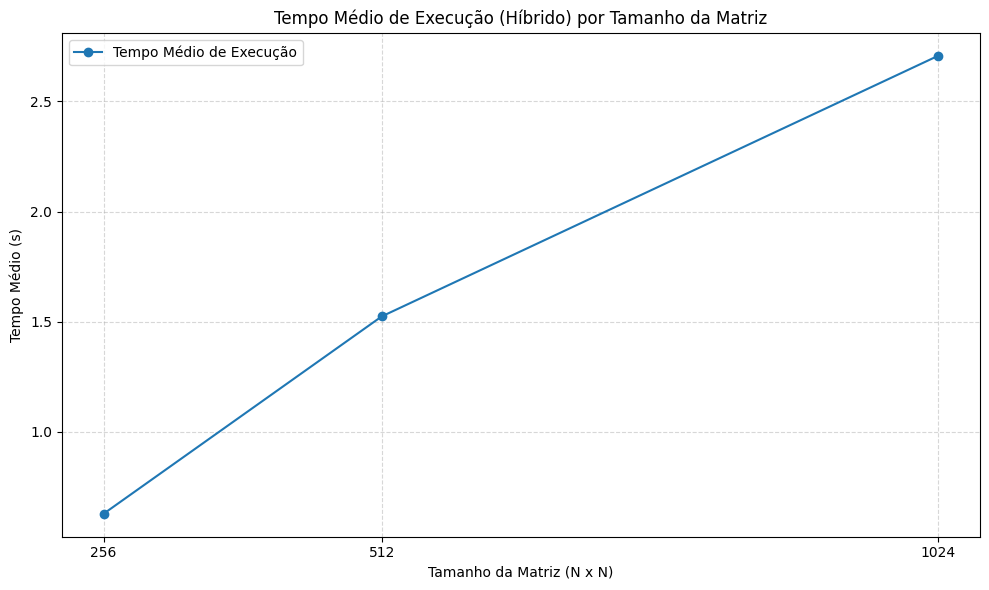

In [23]:
import matplotlib.pyplot as plt

# Filtrar apenas Tempo_real
df_exec = df_metricas_hibrido[df_metricas_hibrido["Métrica"] == "Tempo_real"]

plt.figure(figsize=(10, 6))

# Plotar linha única: eixo X é o tamanho da matriz, Y é o tempo médio
plt.plot(df_exec["Matriz"], df_exec["Média"], marker='o', label="Tempo Médio de Execução")

# Estética
plt.title("Tempo Médio de Execução (Híbrido) por Tamanho da Matriz")
plt.xlabel("Tamanho da Matriz (N x N)")
plt.ylabel("Tempo Médio (s)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df_exec["Matriz"])
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
import os
os.getcwd()


'/home/jals/Documents/ualg/projeto_backup/analise/hibrido'

In [25]:
os.chdir("..")


In [26]:
os.chdir("sequencial")


In [27]:
df_sequencial_256 = carregar_ficheiro_sequencial("tempos_256.csv")
df_sequencial_512 = carregar_ficheiro_sequencial("tempos_512.csv")
df_sequencial_1024 = carregar_ficheiro_sequencial("tempos_1024.csv")


✔️ Criado: df_sequencial_256
✔️ Criado: df_sequencial_512
✔️ Criado: df_sequencial_1024


In [28]:
import os
import pandas as pd
from io import StringIO

def carregar_ficheiro_sequencial(nome_ficheiro):
    with open(nome_ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]
    
    df = pd.read_csv(StringIO("".join(linhas_validas)), names=[
        "Execucao", "Tempo_real", "Tempo_user", "Tempo_sys"
    ])
    return df

# Mudar para a pasta certa (se ainda não tiveres feito)
# os.chdir("sequencial")

# Carregar automaticamente todos os df_sequencial_<tamanho>
ficheiros = [f for f in os.listdir() if f.startswith("tempos_") and "threads" not in f and f.endswith(".csv")]

for ficheiro in ficheiros:
    tamanho = ficheiro.split("_")[1].split(".")[0]
    nome_var = f"df_sequencial_{tamanho}"
    globals()[nome_var] = carregar_ficheiro_sequencial(ficheiro)
    print(f"✅ Criado: {nome_var}")


✅ Criado: df_sequencial_512
✅ Criado: df_sequencial_1024
✅ Criado: df_sequencial_256
✅ Criado: df_sequencial_2048


In [29]:
df_sequencial_256.head()
df_sequencial_512.describe()


,Execucao,Tempo_real,Tempo_user,Tempo_sys
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,0.574467,0.568800,0.005533
std,8.803408,0.008157,0.008782,0.003126
min,1.000000,0.561000,0.553000,0.000000
25%,8.250000,0.569000,0.563250,0.004000
50%,15.500000,0.574000,0.568000,0.004000
75%,22.750000,0.579750,0.573500,0.008000
max,30.000000,0.596000,0.592000,0.013000


In [30]:
import re
from io import StringIO

def carregar_ficheiro_openmp(nome_ficheiro):
    with open(nome_ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]
    
    df = pd.read_csv(StringIO("".join(linhas_validas)), names=[
        "Execucao", "Tempo_real", "Tempo_user", "Tempo_sys", "Tempo_extra"
    ])
    return df

# Procurar todos os ficheiros OpenMP
ficheiros_openmp = [f for f in os.listdir() if f.startswith("tempos_") and "threads" in f and f.endswith(".csv")]

# Organizar em dicionários por tamanho de matriz
dicionarios_openmp = {}

for ficheiro in ficheiros_openmp:
    match = re.match(r"tempos_(\d+)_threads(\d+)\.csv", ficheiro)
    if not match:
        continue

    tamanho, threads = match.groups()
    tamanho = int(tamanho)
    threads = int(threads)

    df = carregar_ficheiro_openmp(ficheiro)

    nome_var = f"df_openmp_{tamanho}_{threads}"
    globals()[nome_var] = df  # cria a variável individual se quiseres usar diretamente

    # Atualiza o dicionário correspondente
    if tamanho not in dicionarios_openmp:
        dicionarios_openmp[tamanho] = {}

    dicionarios_openmp[tamanho][threads] = df

# Criar dfs_openmp_<tamanho> com base nos dicionários
for tamanho, dfs in dicionarios_openmp.items():
    globals()[f"dfs_openmp_{tamanho}"] = dfs
    print(f"✅ Criado: dfs_openmp_{tamanho} com {len(dfs)} configurações")


In [31]:
import os
[f for f in os.listdir() if f.startswith("tempos_512_threads")]


[]

In [32]:
"dfs_openmp_512" in globals()


False

In [33]:
print(dicionarios_openmp.keys())


dict_keys([])


In [34]:
import os
os.chdir("..")
print("Agora estou em:", os.getcwd())


Agora estou em: /home/jals/Documents/ualg/projeto_backup/analise


In [35]:
os.listdir()

['Untitled.ipynb',
 '.ipynb_checkpoints',
 'metricas.ipynb',
 'openmp',
 'mpi',
 'hibrido',
 'sequencial']

In [36]:
import os
import pandas as pd
import re
from io import StringIO

# Função para carregar ficheiros sequenciais
def carregar_ficheiro_sequencial(path_ficheiro):
    with open(path_ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]
    df = pd.read_csv(StringIO("".join(linhas_validas)), names=[
        "Execucao", "Tempo_real", "Tempo_user", "Tempo_sys"
    ])
    return df

# Função para carregar ficheiros OpenMP
def carregar_ficheiro_openmp(path_ficheiro):
    with open(path_ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]
    df = pd.read_csv(StringIO("".join(linhas_validas)), names=[
        "Execucao", "Tempo_real", "Tempo_user", "Tempo_sys", "Tempo_extra"
    ])
    return df

# Função para carregar ficheiros híbridos
def carregar_ficheiro_hibrido(path_ficheiro):
    with open(path_ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]

    colunas = [
        "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
        "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"
    ]
    df = pd.read_csv(StringIO("".join(linhas_validas)), names=colunas)

    for col in ["Tempo_real", "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    df["Tempo_Comunicacao"] = df["Tempo_Bcast_Scatterv"] + (df["Tempo_Gatherv"] - df["Tempo_Computacao"])
    return df

# 1. Carregar ficheiros sequenciais
df_sequencial = {}
for f in os.listdir("sequencial"):
    if f.startswith("tempos_") and f.endswith(".csv") and "threads" not in f:
        tamanho = int(f.split("_")[1].split(".")[0])
        df_sequencial[tamanho] = carregar_ficheiro_sequencial(os.path.join("sequencial", f))

# 2. Carregar ficheiros OpenMP
dfs_openmp = {}
for f in os.listdir("openmp"):
    match = re.match(r"tempos_(\d+)_threads(\d+)\.csv", f)
    if match:
        tamanho = int(match.group(1))
        threads = int(match.group(2))
        if tamanho not in dfs_openmp:
            dfs_openmp[tamanho] = {}
        dfs_openmp[tamanho][threads] = carregar_ficheiro_openmp(os.path.join("openmp", f))

# 3. Carregar ficheiros híbridos
df_hibrido = {}
for f in os.listdir("hibrido"):
    match = re.match(r"tempos_hibrido_(\d+)\.csv", f)
    if match:
        tamanho = int(match.group(1))
        df_hibrido[tamanho] = carregar_ficheiro_hibrido(os.path.join("hibrido", f))


# 4. Carregar ficheiros MPI (tempo real da linha "Média")
tempo_mpi = {}
for f in os.listdir("mpi"):
    match = re.match(r"mpi_tempos_(\d+)\.csv", f)
    if match:
        tamanho = int(match.group(1))
        with open(os.path.join("mpi", f), "r") as file:
            for linha in file:
                if linha.startswith("Média"):
                    partes = linha.strip().split(',')
                    try:
                        tempo_real = float(partes[1])  # Tempo_real está na coluna 1
                        tempo_mpi[tamanho] = tempo_real
                    except:
                        tempo_mpi[tamanho] = None
                    break

print("✅ Todos os dados (incluindo MPI) carregados com sucesso!")


print("✅ Todos os dados carregados com sucesso!")


✅ Todos os dados (incluindo MPI) carregados com sucesso!
✅ Todos os dados carregados com sucesso!


In [37]:
df_sequencial[512].head()
dfs_openmp[256][4].describe()
df_hibrido[1024].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Execucao              600 non-null    int64  
 1   MPI_Config            600 non-null    object 
 2   np                    600 non-null    int64  
 3   OMP_Threads           600 non-null    int64  
 4   Tempo_real            600 non-null    float64
 5   Tempo_user            600 non-null    float64
 6   Tempo_sys             600 non-null    float64
 7   Tempo_total           600 non-null    float64
 8   Tempo_Bcast_Scatterv  600 non-null    float64
 9   Tempo_Computacao      600 non-null    float64
 10  Tempo_Gatherv         600 non-null    float64
 11  Tempo_Comunicacao     600 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 56.4+ KB


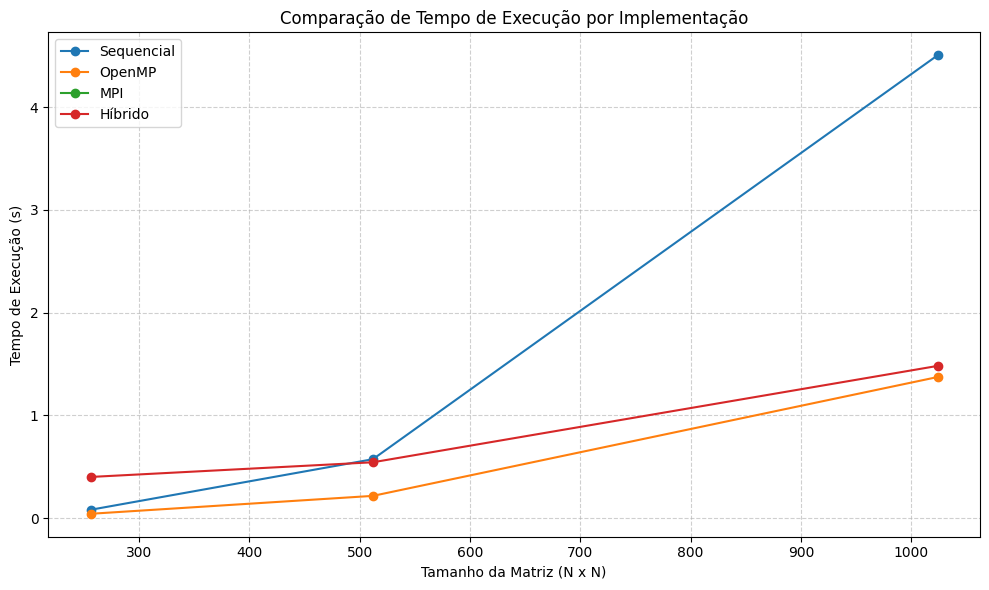

In [38]:
import matplotlib.pyplot as plt

# Matrizes fixas
matrizes = [256, 512, 1024]

# Preparar tempos
tempos = {
    "Sequencial": [],
    "OpenMP": [],
    "MPI": [],
    "Híbrido": []
}

for tamanho in matrizes:
    # Tempo sequencial
    tempos["Sequencial"].append(df_sequencial[tamanho]["Tempo_real"].mean())

    # Melhor tempo OpenMP (mínimo entre as configs disponíveis)
    tempos_openmp = [df["Tempo_real"].mean() for df in dfs_openmp[tamanho].values()]
    tempos["OpenMP"].append(min(tempos_openmp))

    # Tempo MPI
    tempos["MPI"].append(tempo_mpi.get(tamanho, None))

    # Melhor tempo Híbrido (mínimo entre execuções por config)
    tempos_hibrido = df_hibrido[tamanho].groupby(["np", "OMP_Threads"])['Tempo_real'].mean()
    tempos["Híbrido"].append(tempos_hibrido.min())

# Criar DataFrame comparativo
df_comparativo = pd.DataFrame({
    "Matriz": matrizes,
    "Sequencial": tempos["Sequencial"],
    "OpenMP": tempos["OpenMP"],
    "MPI": tempos["MPI"],
    "Híbrido": tempos["Híbrido"]
})

# Gráfico
plt.figure(figsize=(10, 6))
for impl in ["Sequencial", "OpenMP", "MPI", "Híbrido"]:
    plt.plot(df_comparativo["Matriz"], df_comparativo[impl], marker='o', label=impl)

plt.title("Comparação de Tempo de Execução por Implementação")
plt.xlabel("Tamanho da Matriz (N x N)")
plt.ylabel("Tempo de Execução (s)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
# 3. MPI: tempo real da linha "Média"
def tempos_mpi():
    resultados = {}
    for f in os.listdir("mpi"):
        if f.startswith("tempos_") and f.endswith(".csv") and "threads" not in f:
            tamanho = int(f.split("_")[1].split(".")[0])
            with open(os.path.join("mpi", f)) as file:
                for linha in file:
                    if "Média" in linha:
                        try:
                            tempo = float(linha.split(",")[1])
                            resultados[tamanho] = tempo
                        except:
                            resultados[tamanho] = np.nan
                        break
    return resultados



✅ Tabela de tempos médios de execução:
   Matriz  Sequencial     OpenMP  MPI    Híbrido
0      16         NaN        NaN  NaN   0.411000
1      32         NaN        NaN  NaN   0.454667
2     256    0.082467   0.043500  NaN   0.401800
3     512    0.574467   0.217833  NaN   0.544700
4    1024    4.503767   1.373867  NaN   1.482100
5    2048   36.070300  10.090333  NaN  19.245792


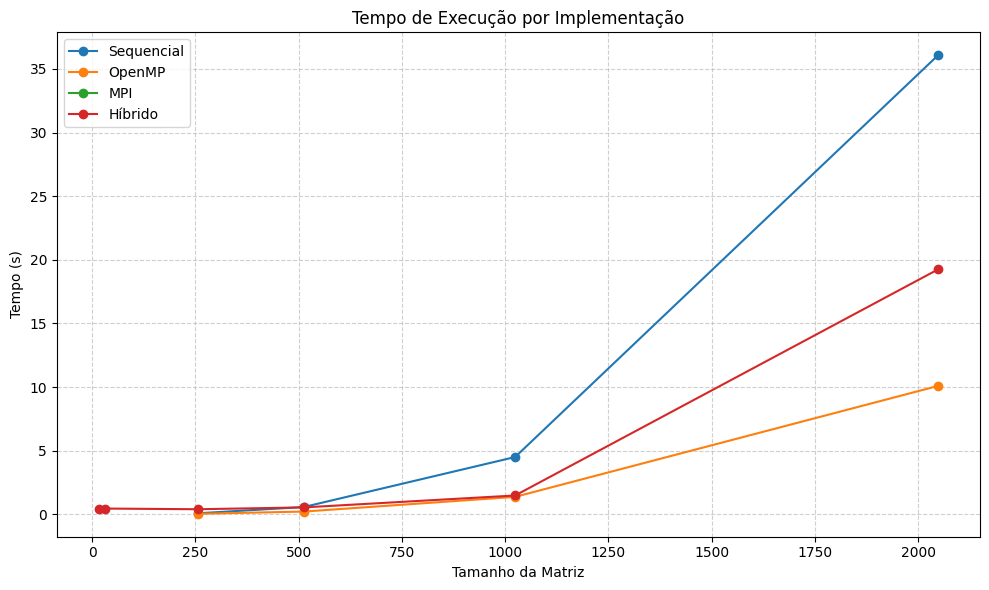

In [40]:
import os
import pandas as pd
from io import StringIO
import re
import numpy as np

# 1. Sequencial: tempo médio de execução por matriz
def tempos_sequencial():
    resultados = {}
    for f in os.listdir("sequencial"):
        if f.startswith("tempos_") and "threads" not in f:
            tamanho = int(f.split("_")[1].split(".")[0])
            with open(os.path.join("sequencial", f)) as file:
                linhas = [linha for linha in file if linha.strip().split(',')[0].isdigit()]
            df = pd.read_csv(StringIO("".join(linhas)), names=["Execucao", "Tempo_real", "Tempo_user", "Tempo_sys"])
            resultados[tamanho] = df["Tempo_real"].mean()
    return resultados

# 2. OpenMP: menor tempo médio por matriz (melhor config)
def tempos_openmp():
    resultados = {}
    for f in os.listdir("openmp"):
        m = re.match(r"tempos_(\d+)_threads(\d+)\.csv", f)
        if m:
            tamanho = int(m.group(1))
            with open(os.path.join("openmp", f)) as file:
                linhas = [linha for linha in file if linha.strip().split(',')[0].isdigit()]
            df = pd.read_csv(StringIO("".join(linhas)), names=["Execucao", "Tempo_real", "Tempo_user", "Tempo_sys", "Tempo_extra"])
            tempo_medio = df["Tempo_real"].mean()
            if tamanho not in resultados or tempo_medio < resultados[tamanho]:
                resultados[tamanho] = tempo_medio
    return resultados

# 3. MPI: tempo real da linha "Média"
def tempos_mpi():
    resultados = {}
    for f in os.listdir("mpi"):
        m = re.match(r"mpi_tempos_(\d+)\.csv", f)
        if m:
            tamanho = int(m.group(1))
            with open(os.path.join("mpi", f)) as file:
                for linha in file:
                    if "Média" in linha:
                        try:
                            tempo = float(linha.split(",")[1])
                            resultados[tamanho] = tempo
                        except:
                            resultados[tamanho] = np.nan
                        break
    return resultados

# 4. Híbrido: melhor tempo médio por np x threads
def tempos_hibrido():
    resultados = {}
    for f in os.listdir("hibrido"):
        m = re.match(r"tempos_hibrido_(\d+)\.csv", f)
        if m:
            tamanho = int(m.group(1))
            with open(os.path.join("hibrido", f)) as file:
                linhas = [linha for linha in file if linha.strip().split(',')[0].isdigit()]
            df = pd.read_csv(StringIO("".join(linhas)), names=[
                "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
                "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"])
            tempo_medio = df.groupby(["np", "OMP_Threads"])["Tempo_real"].mean().min()
            resultados[tamanho] = tempo_medio
    return resultados

# Executar tudo e montar tabela final
seq = tempos_sequencial()
omp = tempos_openmp()
mpi = tempos_mpi()
hib = tempos_hibrido()

matrizes = sorted(set(seq) | set(omp) | set(mpi) | set(hib))
df_final = pd.DataFrame({
    "Matriz": matrizes,
    "Sequencial": [seq.get(m, np.nan) for m in matrizes],
    "OpenMP": [omp.get(m, np.nan) for m in matrizes],
    "MPI": [mpi.get(m, np.nan) for m in matrizes],
    "Híbrido": [hib.get(m, np.nan) for m in matrizes]
})

print("\n✅ Tabela de tempos médios de execução:")
print(df_final)

# Gráfico final
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for col in ["Sequencial", "OpenMP", "MPI", "Híbrido"]:
    plt.plot(df_final["Matriz"], df_final[col], marker='o', label=col)
plt.title("Tempo de Execução por Implementação")
plt.xlabel("Tamanho da Matriz")
plt.ylabel("Tempo (s)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
import os
os.getcwd()


'/home/jals/Documents/ualg/projeto_backup/analise'

In [42]:
os.chdir("hibrido")

In [43]:
os.getcwd()

'/home/jals/Documents/ualg/projeto_backup/analise/hibrido'

   Matriz  Tempo_medio_execucao
0     256                0.4018
1     512                0.5447
2    1024                1.4821


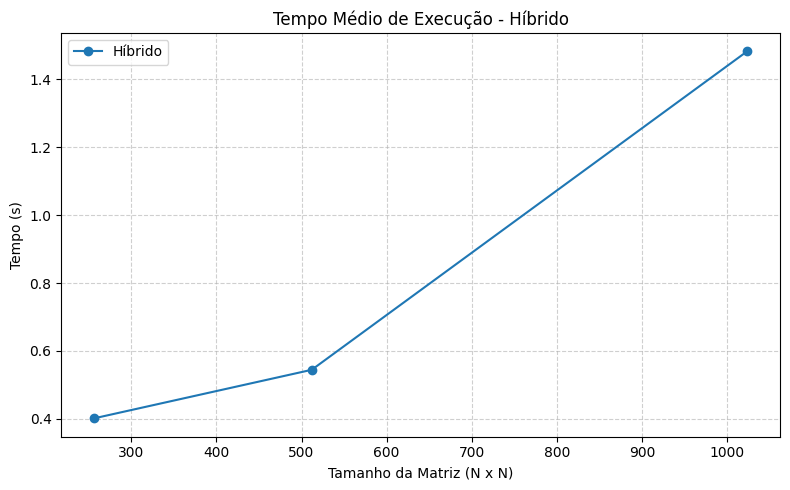

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Função para processar um ficheiro híbrido e obter o melhor tempo médio
def processar_hibrido(ficheiro, tamanho):
    with open(ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]
    
    colunas = [
        "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
        "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"
    ]
    df = pd.read_csv(StringIO("".join(linhas_validas)), names=colunas)
    df["Tempo_real"] = pd.to_numeric(df["Tempo_real"], errors="coerce")

    # Melhor tempo médio entre combinações np x threads
    tempo_medio_min = df.groupby(["np", "OMP_Threads"])["Tempo_real"].mean().min()
    return tamanho, tempo_medio_min

# Lista de ficheiros e tamanhos
ficheiros_hibrido = {
    256: "tempos_hibrido_256.csv",
    512: "tempos_hibrido_512.csv",
    1024: "tempos_hibrido_1024.csv"
}

tempos_hibrido = {}

# Processar todos
for tamanho, ficheiro in ficheiros_hibrido.items():
    tamanho, tempo = processar_hibrido(ficheiro, tamanho)
    tempos_hibrido[tamanho] = tempo

# Criar DataFrame
df_hibrido = pd.DataFrame({
    "Matriz": list(tempos_hibrido.keys()),
    "Tempo_medio_execucao": list(tempos_hibrido.values())
}).sort_values("Matriz")

# Mostrar dados
print(df_hibrido)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(df_hibrido["Matriz"], df_hibrido["Tempo_medio_execucao"], marker='o', label="Híbrido")
plt.title("Tempo Médio de Execução - Híbrido")
plt.xlabel("Tamanho da Matriz (N x N)")
plt.ylabel("Tempo (s)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


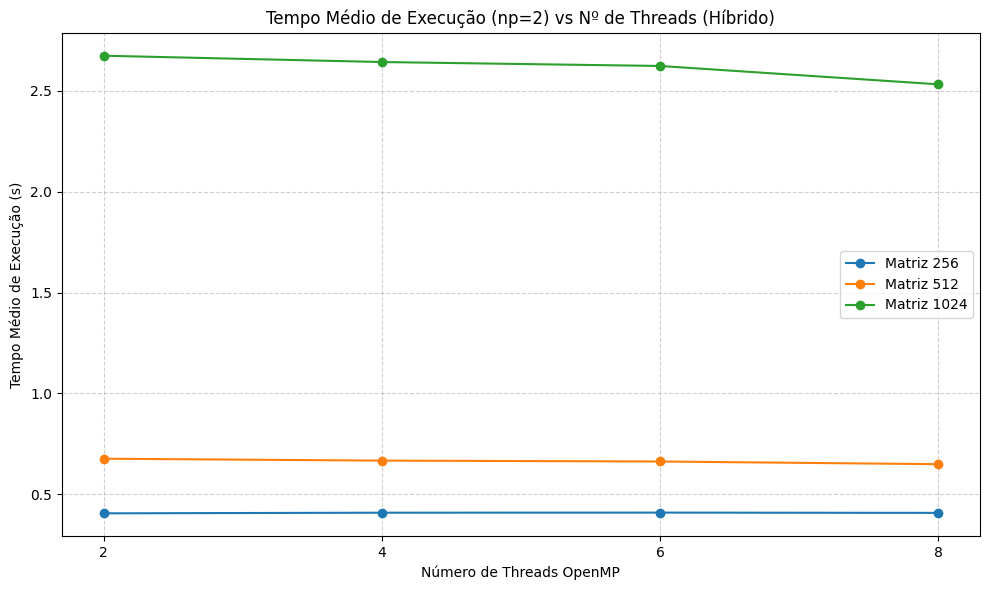

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Ficheiros por matriz
ficheiros_hibrido = {
    256: "tempos_hibrido_256.csv",
    512: "tempos_hibrido_512.csv",
    1024: "tempos_hibrido_1024.csv"
}

# Carregar e preparar os dados
df_total = []

for tamanho, ficheiro in ficheiros_hibrido.items():
    with open(ficheiro, "r") as f:
        linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]
    
    colunas = [
        "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
        "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"
    ]
    df = pd.read_csv(StringIO("".join(linhas_validas)), names=colunas)
    df["Tempo_real"] = pd.to_numeric(df["Tempo_real"], errors="coerce")
    
    # Filtrar apenas np = 2 (ou qualquer outro que queiras fixar)
    df_np2 = df[df["np"] == 2]
    
    # Calcular tempo médio por OMP_Threads
    medias = df_np2.groupby("OMP_Threads")["Tempo_real"].mean().reset_index()
    medias["Matriz"] = tamanho
    df_total.append(medias)

# Concatenar tudo
df_resultado = pd.concat(df_total)

# Gráfico
plt.figure(figsize=(10, 6))

for matriz in sorted(df_resultado["Matriz"].unique()):
    subset = df_resultado[df_resultado["Matriz"] == matriz]
    plt.plot(subset["OMP_Threads"], subset["Tempo_real"], marker='o', label=f"Matriz {matriz}")

plt.title("Tempo Médio de Execução (np=2) vs Nº de Threads (Híbrido)")
plt.xlabel("Número de Threads OpenMP")
plt.ylabel("Tempo Médio de Execução (s)")
plt.xticks(sorted(df_resultado["OMP_Threads"].unique()))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Certifica-te que este dicionário foi criado previamente com os pivot tables por matriz:
# heatmaps_data = {256: df_pivot_256, 512: df_pivot_512, 1024: df_pivot_1024, ...}

# Garante que temos os dados da matriz 1024
if 1024 in heatmaps_data:
    data_1024 = heatmaps_data[1024]

    # Converter para formato longo (long-form DataFrame)
    df_linhas_1024 = data_1024.reset_index().melt(id_vars="np", var_name="OMP_Threads", value_name="Tempo_real")

    # Gráfico de linhas
    plt.figure(figsize=(10, 6))

    for np_val in sorted(df_linhas_1024["np"].unique()):
        subset = df_linhas_1024[df_linhas_1024["np"] == np_val]
        plt.plot(subset["OMP_Threads"], subset["Tempo_real"], marker='o', label=f"np = {np_val}")

    plt.title("Tempo Médio de Execução - Matriz 1024")
    plt.xlabel("Nº de Threads OpenMP")
    plt.ylabel("Tempo Médio de Execução (s)")
    plt.xticks(sorted(df_linhas_1024["OMP_Threads"].unique()))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title="Processos MPI", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("❌ A matriz 1024 não está carregada em heatmaps_data.")


NameError: name 'heatmaps_data' is not defined

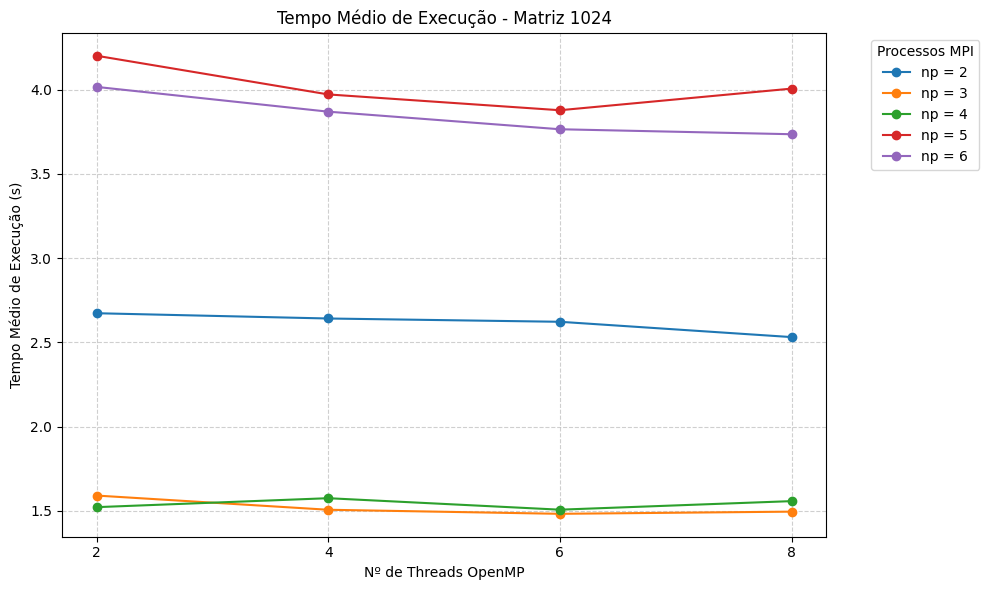

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Caminho para o ficheiro da matriz 1024
ficheiro_1024 = "tempos_hibrido_1024.csv"  # <- ajusta o caminho se necessário

# Ler e processar o ficheiro
with open(ficheiro_1024, "r") as f:
    linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]

colunas = [
    "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
    "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"
]
df_1024 = pd.read_csv(StringIO("".join(linhas_validas)), names=colunas)
df_1024["Tempo_real"] = pd.to_numeric(df_1024["Tempo_real"], errors="coerce")

# Agrupar e calcular médias (pivot para gráfico)
data_1024 = df_1024.groupby(["np", "OMP_Threads"])["Tempo_real"].mean().unstack()

# Converter para formato longo
df_linhas_1024 = data_1024.reset_index().melt(id_vars="np", var_name="OMP_Threads", value_name="Tempo_real")

# Gráfico de linhas
plt.figure(figsize=(10, 6))
for np_val in sorted(df_linhas_1024["np"].unique()):
    subset = df_linhas_1024[df_linhas_1024["np"] == np_val]
    plt.plot(subset["OMP_Threads"], subset["Tempo_real"], marker='o', label=f"np = {np_val}")

plt.title("Tempo Médio de Execução - Matriz 1024")
plt.xlabel("Nº de Threads OpenMP")
plt.ylabel("Tempo Médio de Execução (s)")
plt.xticks(sorted(df_linhas_1024["OMP_Threads"].unique()))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Processos MPI", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


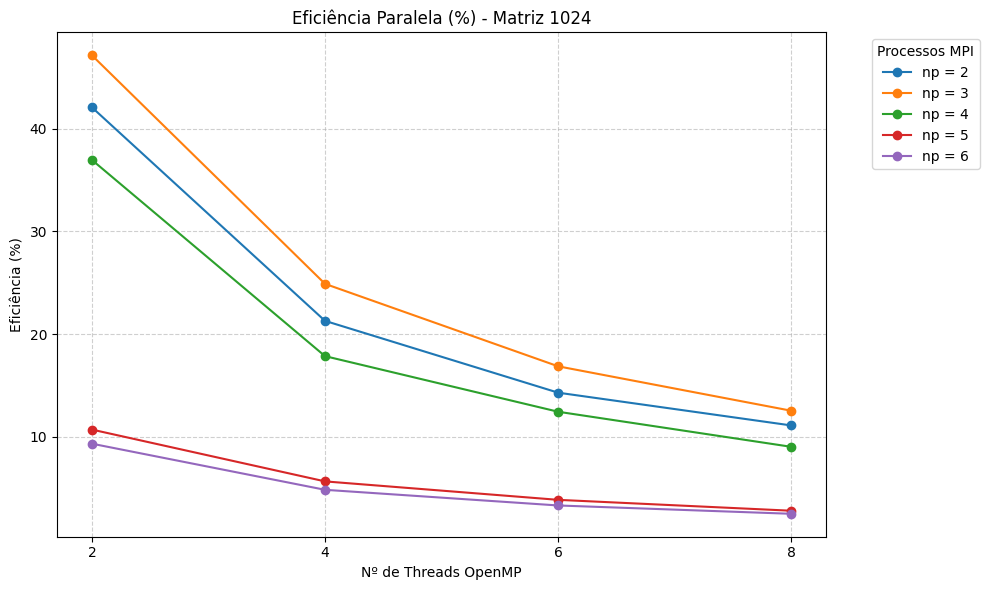

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Carregamento e processamento do ficheiro
ficheiro_1024 = "tempos_hibrido_1024.csv"  # Atualiza o caminho se necessário

with open(ficheiro_1024, "r") as f:
    linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]

colunas = [
    "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
    "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"
]
df_1024 = pd.read_csv(StringIO("".join(linhas_validas)), names=colunas)
df_1024["Tempo_real"] = pd.to_numeric(df_1024["Tempo_real"], errors="coerce")

# Tempo sequencial fornecido manualmente
tempo_sequencial_1024 = 4.50  # Altera aqui se souberes o valor exato

# Calcular eficiência
df_1024["Total_Recursos"] = df_1024["np"] * df_1024["OMP_Threads"]
df_eficiencia = df_1024.groupby(["np", "OMP_Threads"]).agg({
    "Tempo_real": "mean",
    "Total_Recursos": "first"
}).reset_index()

df_eficiencia["Eficiência (%)"] = (tempo_sequencial_1024 / (df_eficiencia["Tempo_real"] * df_eficiencia["Total_Recursos"])) * 100

# Gráfico de linhas da eficiência
plt.figure(figsize=(10, 6))
for np_val in sorted(df_eficiencia["np"].unique()):
    subset = df_eficiencia[df_eficiencia["np"] == np_val]
    plt.plot(subset["OMP_Threads"], subset["Eficiência (%)"], marker='o', label=f"np = {np_val}")

plt.title("Eficiência Paralela (%) - Matriz 1024")
plt.xlabel("Nº de Threads OpenMP")
plt.ylabel("Eficiência (%)")
plt.xticks(sorted(df_eficiencia["OMP_Threads"].unique()))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Processos MPI", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


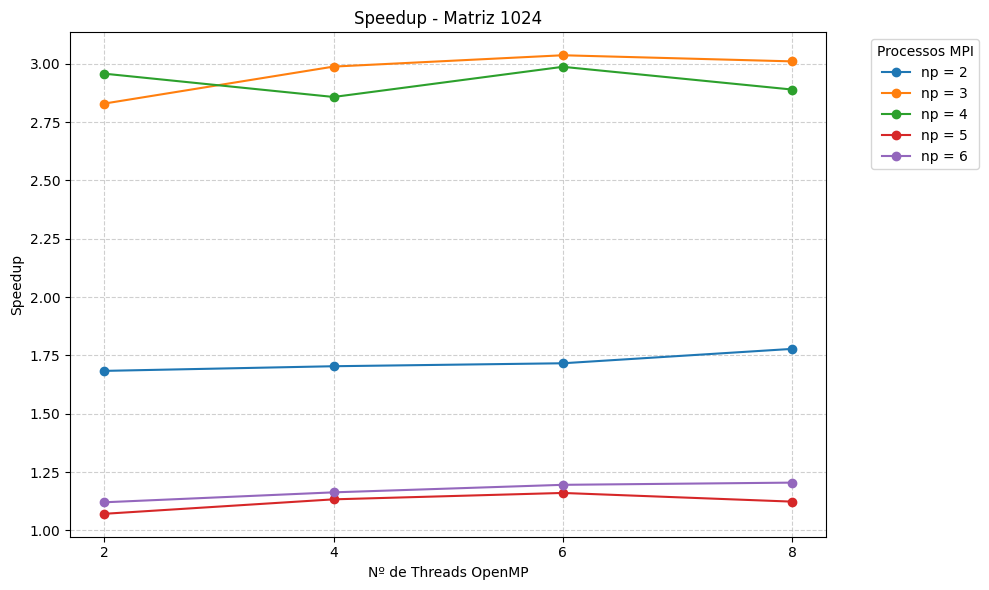

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Caminho para o ficheiro da matriz 1024
ficheiro_1024 = "tempos_hibrido_1024.csv"  # ajusta se necessário

# Ler e preparar os dados
with open(ficheiro_1024, "r") as f:
    linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]

colunas = [
    "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
    "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"
]
df_1024 = pd.read_csv(StringIO("".join(linhas_validas)), names=colunas)
df_1024["Tempo_real"] = pd.to_numeric(df_1024["Tempo_real"], errors="coerce")

# Tempo sequencial da matriz 1024
tempo_sequencial_1024 = 4.50  # substitui se tiveres valor mais exato

# Calcular média de tempo por (np, OMP_Threads)
df_speedup = df_1024.groupby(["np", "OMP_Threads"]).agg({
    "Tempo_real": "mean"
}).reset_index()

# Calcular speedup
df_speedup["Speedup"] = tempo_sequencial_1024 / df_speedup["Tempo_real"]

# Gráfico de linhas
plt.figure(figsize=(10, 6))
for np_val in sorted(df_speedup["np"].unique()):
    subset = df_speedup[df_speedup["np"] == np_val]
    plt.plot(subset["OMP_Threads"], subset["Speedup"], marker='o', label=f"np = {np_val}")

plt.title("Speedup - Matriz 1024")
plt.xlabel("Nº de Threads OpenMP")
plt.ylabel("Speedup")
plt.xticks(sorted(df_speedup["OMP_Threads"].unique()))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Processos MPI", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


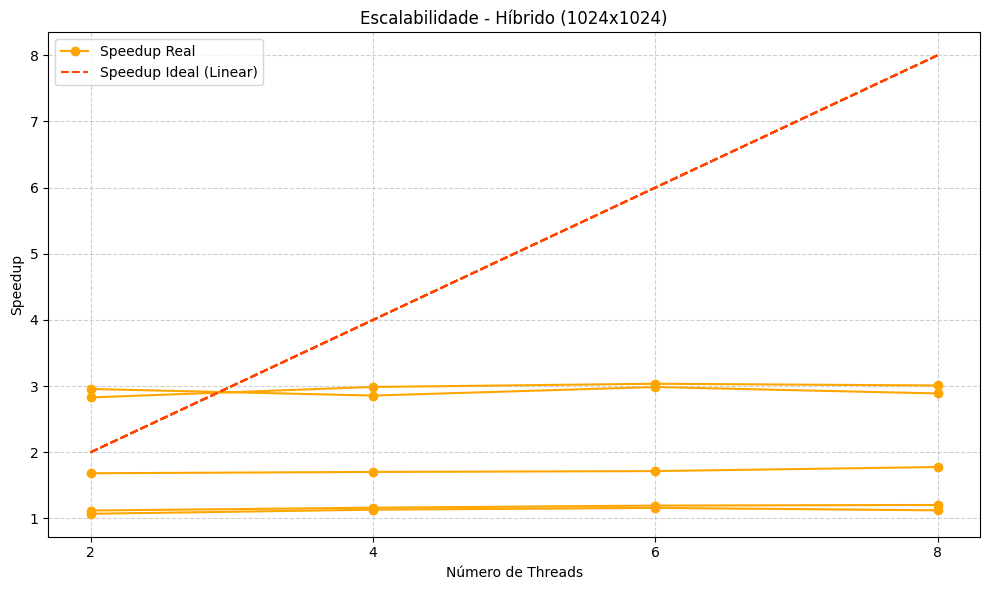

In [50]:
import matplotlib.pyplot as plt

# Supondo que já tens `df_speedup` com colunas: np, OMP_Threads, Speedup

plt.figure(figsize=(10, 6))

for np_val in sorted(df_speedup["np"].unique()):
    subset = df_speedup[df_speedup["np"] == np_val]
    
    # Plot real
    plt.plot(subset["OMP_Threads"], subset["Speedup"], marker='o', color='orange', label="Speedup Real" if np_val == min(df_speedup["np"]) else "")
    
    # Plot linha ideal
    plt.plot(subset["OMP_Threads"], subset["OMP_Threads"], linestyle='--', color='orangered', label="Speedup Ideal (Linear)" if np_val == min(df_speedup["np"]) else "")

plt.title("Escalabilidade - Híbrido (1024x1024)")
plt.xlabel("Número de Threads")
plt.ylabel("Speedup")
plt.xticks(sorted(df_speedup["OMP_Threads"].unique()))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


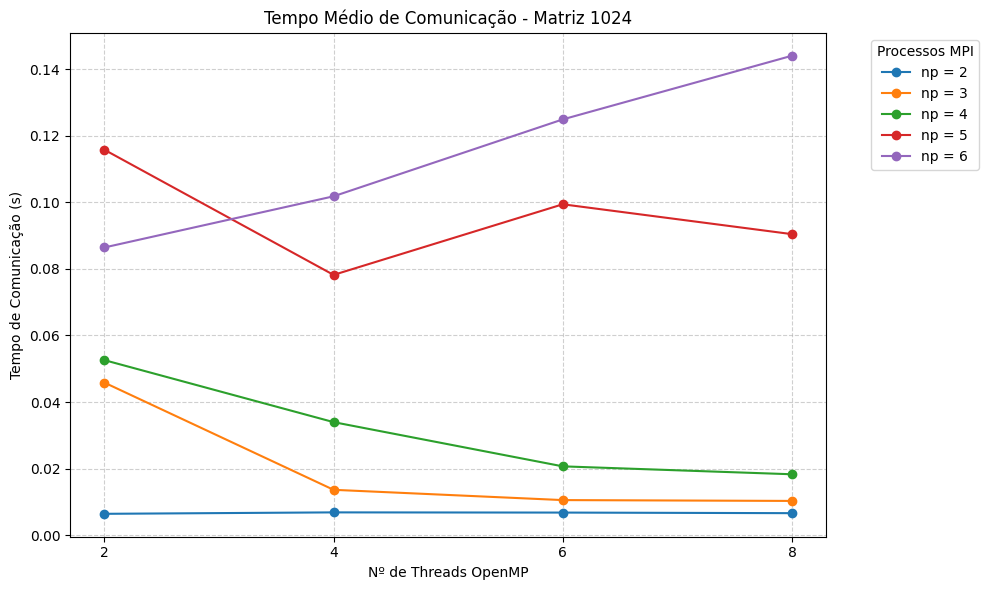

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Caminho para o ficheiro da matriz 1024
ficheiro_1024 = "tempos_hibrido_1024.csv"  # ajusta o caminho conforme necessário

# Ler e preparar os dados
with open(ficheiro_1024, "r") as f:
    linhas_validas = [linha for linha in f if linha.strip().split(',')[0].isdigit()]

colunas = [
    "Execucao", "MPI_Config", "np", "OMP_Threads", "Tempo_real", "Tempo_user", "Tempo_sys",
    "Tempo_total", "Tempo_Bcast_Scatterv", "Tempo_Computacao", "Tempo_Gatherv"
]
df_1024 = pd.read_csv(StringIO("".join(linhas_validas)), names=colunas)

# Conversão de colunas para float
for col in ["Tempo_real", "Tempo_Computacao", "Tempo_Gatherv", "Tempo_Bcast_Scatterv"]:
    df_1024[col] = pd.to_numeric(df_1024[col], errors="coerce")

# Calcular tempo de comunicação
df_1024["Tempo_Comunicacao"] = df_1024["Tempo_Bcast_Scatterv"] + (df_1024["Tempo_Gatherv"] - df_1024["Tempo_Computacao"])

# Calcular média por (np, OMP_Threads)
df_com = df_1024.groupby(["np", "OMP_Threads"])["Tempo_Comunicacao"].mean().reset_index()

# Gráfico de linhas
plt.figure(figsize=(10, 6))
for np_val in sorted(df_com["np"].unique()):
    subset = df_com[df_com["np"] == np_val]
    plt.plot(subset["OMP_Threads"], subset["Tempo_Comunicacao"], marker='o', label=f"np = {np_val}")

plt.title("Tempo Médio de Comunicação - Matriz 1024")
plt.xlabel("Nº de Threads OpenMP")
plt.ylabel("Tempo de Comunicação (s)")
plt.xticks(sorted(df_com["OMP_Threads"].unique()))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Processos MPI", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
